In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("bhp (1).csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  int64  
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 722.0+ KB


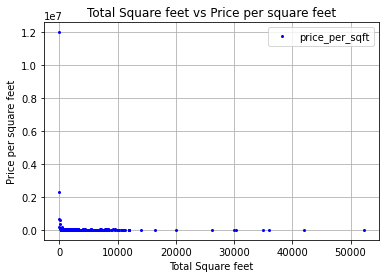

In [3]:

df.plot(x="total_sqft",y="price_per_sqft",style="o",color="blue",markersize=2)
plt.title("Total Square feet vs Price per square feet")
plt.xlabel("Total Square feet")
plt.ylabel("Price per square feet")
plt.grid()
plt.show()

C:\Users\Lakshya Singh Bisht\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


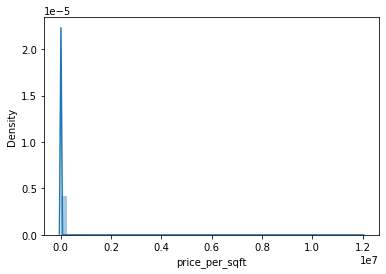

In [4]:
sns.distplot(df["price_per_sqft"])
plt.show()

In [5]:
round(df.price_per_sqft.mean(),2)

7920.34

In [6]:
round(df.price_per_sqft.std(),2)

106727.16

In [7]:
df['zscore']=(df.price_per_sqft-df.price_per_sqft.mean())/df.price_per_sqft.std()


In [8]:
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.034390
5,Whitefield,2 BHK,1170.0,2,38.00,2,3247,-0.043788
6,Old Airport Road,4 BHK,2732.0,4,204.00,4,7467,-0.004248
7,Rajaji Nagar,4 BHK,3300.0,4,600.00,4,18181,0.096139
8,Marathahalli,3 BHK,1310.0,3,63.25,3,4828,-0.028974
9,other,6 Bedroom,1020.0,6,370.00,6,36274,0.265665


In [9]:
df[(df.zscore<-3)|(df.zscore>3)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
345,other,3 Bedroom,11.0,3,74.0,3,672727,6.229030
1106,other,5 Bedroom,24.0,2,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7,115.0,7,2300000,21.476067
11447,Whitefield,4 Bedroom,60.0,4,218.0,4,363333,3.330105


In [10]:
df_noutliers=df[(df.zscore>-3)&(df.zscore<3)]

In [11]:
df.shape

(13200, 8)

In [12]:
df_noutliers.shape

(13195, 8)

In [13]:
round(df_noutliers.price_per_sqft.describe(),2)

count     13195.00
mean       6713.71
std        4876.73
min         267.00
25%        4266.50
50%        5434.00
75%        7313.00
max      200000.00
Name: price_per_sqft, dtype: float64

In [14]:
df_noutliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,0.023299


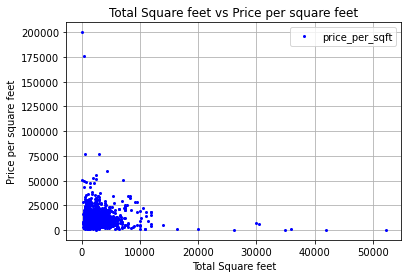

In [15]:
df_noutliers.plot(x="total_sqft",y="price_per_sqft",style="o",color="blue",markersize=2)
plt.title("Total Square feet vs Price per square feet")
plt.xlabel("Total Square feet")
plt.ylabel("Price per square feet")
plt.grid()
plt.show()

C:\Users\Lakshya Singh Bisht\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


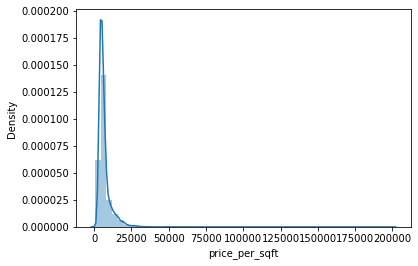

In [16]:
sns.distplot(df_noutliers["price_per_sqft"])
plt.show()